# Title: Heart Disease Prediction

`Author`: [Saad khuda bux](https://github.com/Saadkhudabux)

`Date`: 2024-01-04

`DataSet`: [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)







## Meta Data (Data Set Information)

## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* `trestbps `resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute


### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 


#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 


**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.



## Aims and Objectives
The Objective of this project is to predict the heart disease based on the given attributes of a patient and to find out the various insights from the dataset which could help in understanding the problem more. 

### Importing Libraries

Start by importing the necessary libraries. We will be using the following libraries for this project:

In [1]:
#%pip install xgboost

In [2]:
# Import Libraries

# To handle the data
import pandas as pd
import numpy as np

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# For Classification 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score 

# ignore warnings
import warnings
warnings.filterwarnings('ignore')



### Load the data set

In [3]:
# one-way
# Import the dataset from csv file placed in the same folder

df = pd.read_csv('heart_disease_uci.csv')

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore Each Column


In [4]:
# exploring the info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Checking the data shape
df.shape

(920, 16)

In [6]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [7]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

#### Output
1. The minimum age of the patient is 29 years and the maximum age is 77 years.

<Axes: xlabel='age', ylabel='Count'>

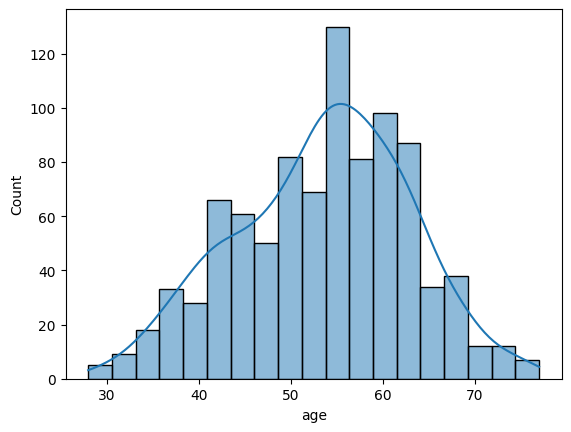

In [8]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde = True)
#plt.title('Age Distribution', fontsize = 15)


Mean of age column:  53.51086956521739
Median of age column:  54.0
Mode of age column:  54


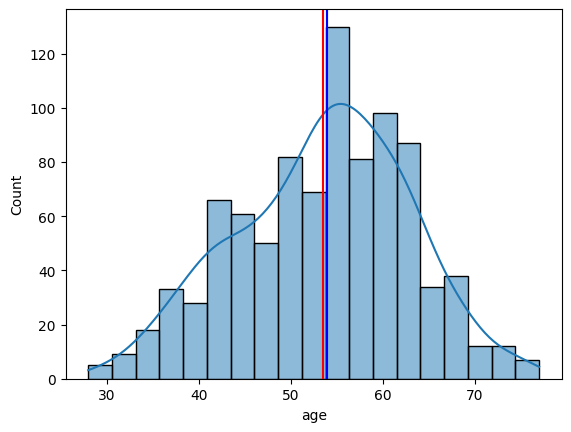

In [9]:
# plot the mean, median and mode of age column using sns
#plt.figure(figsize = (10, 6))
sns.histplot(df['age'], kde = True)
plt.axvline(df['age'].mean(), color = 'red', label = 'mean')
plt.axvline(df['age'].median(), color = 'green', label = 'median')
plt.axvline(df['age'].mode()[0], color = 'blue', label = 'mode')

# print the value of mean, median and mode of age column
print('Mean of age column: ', df['age'].mean())
print('Median of age column: ', df['age'].median())
print('Mode of age column: ', df['age'].mode()[0])




Let's explore the gender based distribution of the patients for age column.

In [10]:
#%pip install nbformat>=4.2.0

In [11]:
# plot the histogram of age column using plotly and colouring this by sex column

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [12]:
# find the value of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [13]:
# calculate the percentage of male and female value counts in the data frame
male = 726
female = 194
total_count = male + female

# convert female to integer
female = int(female)

# calculate percentage
male_percentage = (male / total_count) * 100
female_percentage = (female / total_count) * 100

# printing the results
print(f"Male percentage in the data: {male_percentage: .2f}%")
print(f"Female percentage in the data: {female_percentage: .2f}%")

# difference percentage
difference_percentage = ((male - female) / female) * 100

# printing the results
print(f"Males are: {difference_percentage: .2f}% more than females in the data")


Male percentage in the data:  78.91%
Female percentage in the data:  21.09%
Males are:  274.23% more than females in the data


In [14]:
# find the value count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [15]:
# let's deal with coulmn
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [16]:
# find unique value count of dataset column
df['dataset'].value_counts()


dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [17]:
# plot the countplot of dataset column
#sns.countplot(data=df, x='dataset', hue='sex')

# making the same plot using plotly
fig = px.bar(data_frame=df, x='dataset', color='sex')
fig.show()

# print the value count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [18]:
# make a plot of age column using plotly and colouring by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean, median and mode of age column grouped by dataset column
print(f"Mean of dataset : {df.groupby('dataset')['age'].mean()}")
print('-------------------------------------')
print(f"Median of dataset : {df.groupby('dataset')['age'].median()}")
print('-------------------------------------')
print(f"Mode of dataset : {df.groupby('dataset')['age'].apply(lambda x: x.mode().iloc[0])}")
print('-------------------------------------')


Mean of dataset : dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of dataset : dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of dataset : dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64
-------------------------------------


#### Let's explore cp column: chest pain type

In [19]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

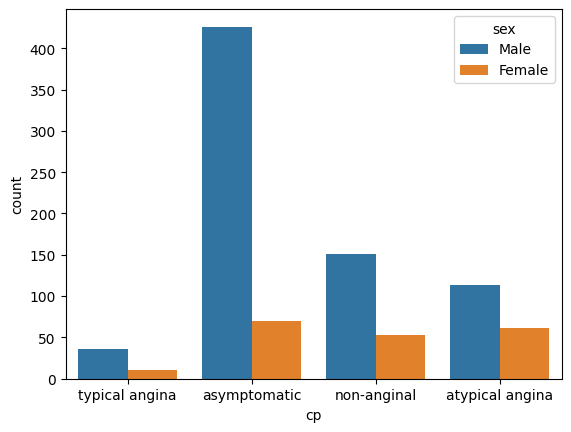

In [20]:
# count plot of cp column grouped by sex column
sns.countplot(data=df, x= 'cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

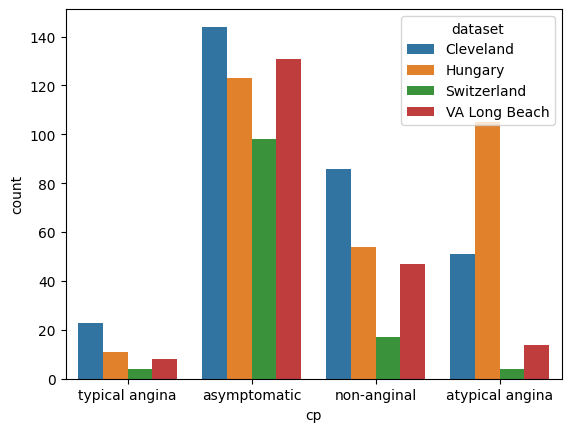

In [21]:
# count plot of cp column grouped by dataset column
sns.countplot(data=df, x= 'cp', hue='dataset')

In [22]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

#### Let's explore trestbps column: resting blood pressure 
The normal resting blood pressure is 120/80 mm Hg. 

`What will happen when the blood pressure is high and low?`: High blood pressure is when the blood pressure in your arteries is elevated and your heart has to work harder than normal to pump blood through the blood vessels. Low blood pressure is when the blood pressure is lower than normal.

In [23]:
# Checking the value count of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

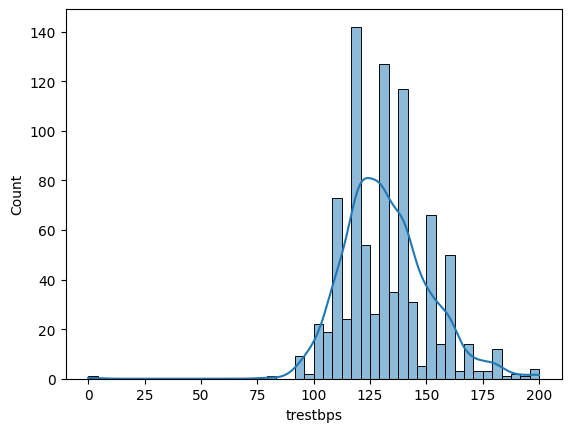

In [24]:
# drawing a histplot of trestbps column
sns.histplot(data=df, x='trestbps', kde=True)

-----

<span style="color:yellow; font-size:250%; font-weight:bold"> Dealing with Missing Values </span>
 

We are going to make a function to deal with missing values

In [25]:
# finding the missing values columns more than 10%
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.to_list()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [27]:
categorical_cols = ['thal', 'dataset', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'trestbps', 'chol', 'age']

In [28]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [29]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [30]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass


Missing Values trestbps : 6.41%


MAE = 13.209999999999999 

RMSE = 17.16963546732792 

R2 = 0.0795505416623371 

Missing Values chol : 3.26%
MAE = 45.36741573033708 

RMSE = 64.17413433757815 

R2 = 0.6737588918344286 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values thalch : 5.98%
MAE = 16.682312138728324 

RMSE = 21.60400704108416 

R2 = 0.3213311222527083 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5538023255813953 

RMSE = 0.7864236608969777 

R2 = 0.4107886707326618 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



In [31]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca          611
thal          0
num           0
dtype: int64

In [32]:
# checking the missing values again
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca    611
dtype: int64

--------

<span style="color:purple; font-size:250%; font-weight:bold"> Dealing with Outliers </span>
 

In [33]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


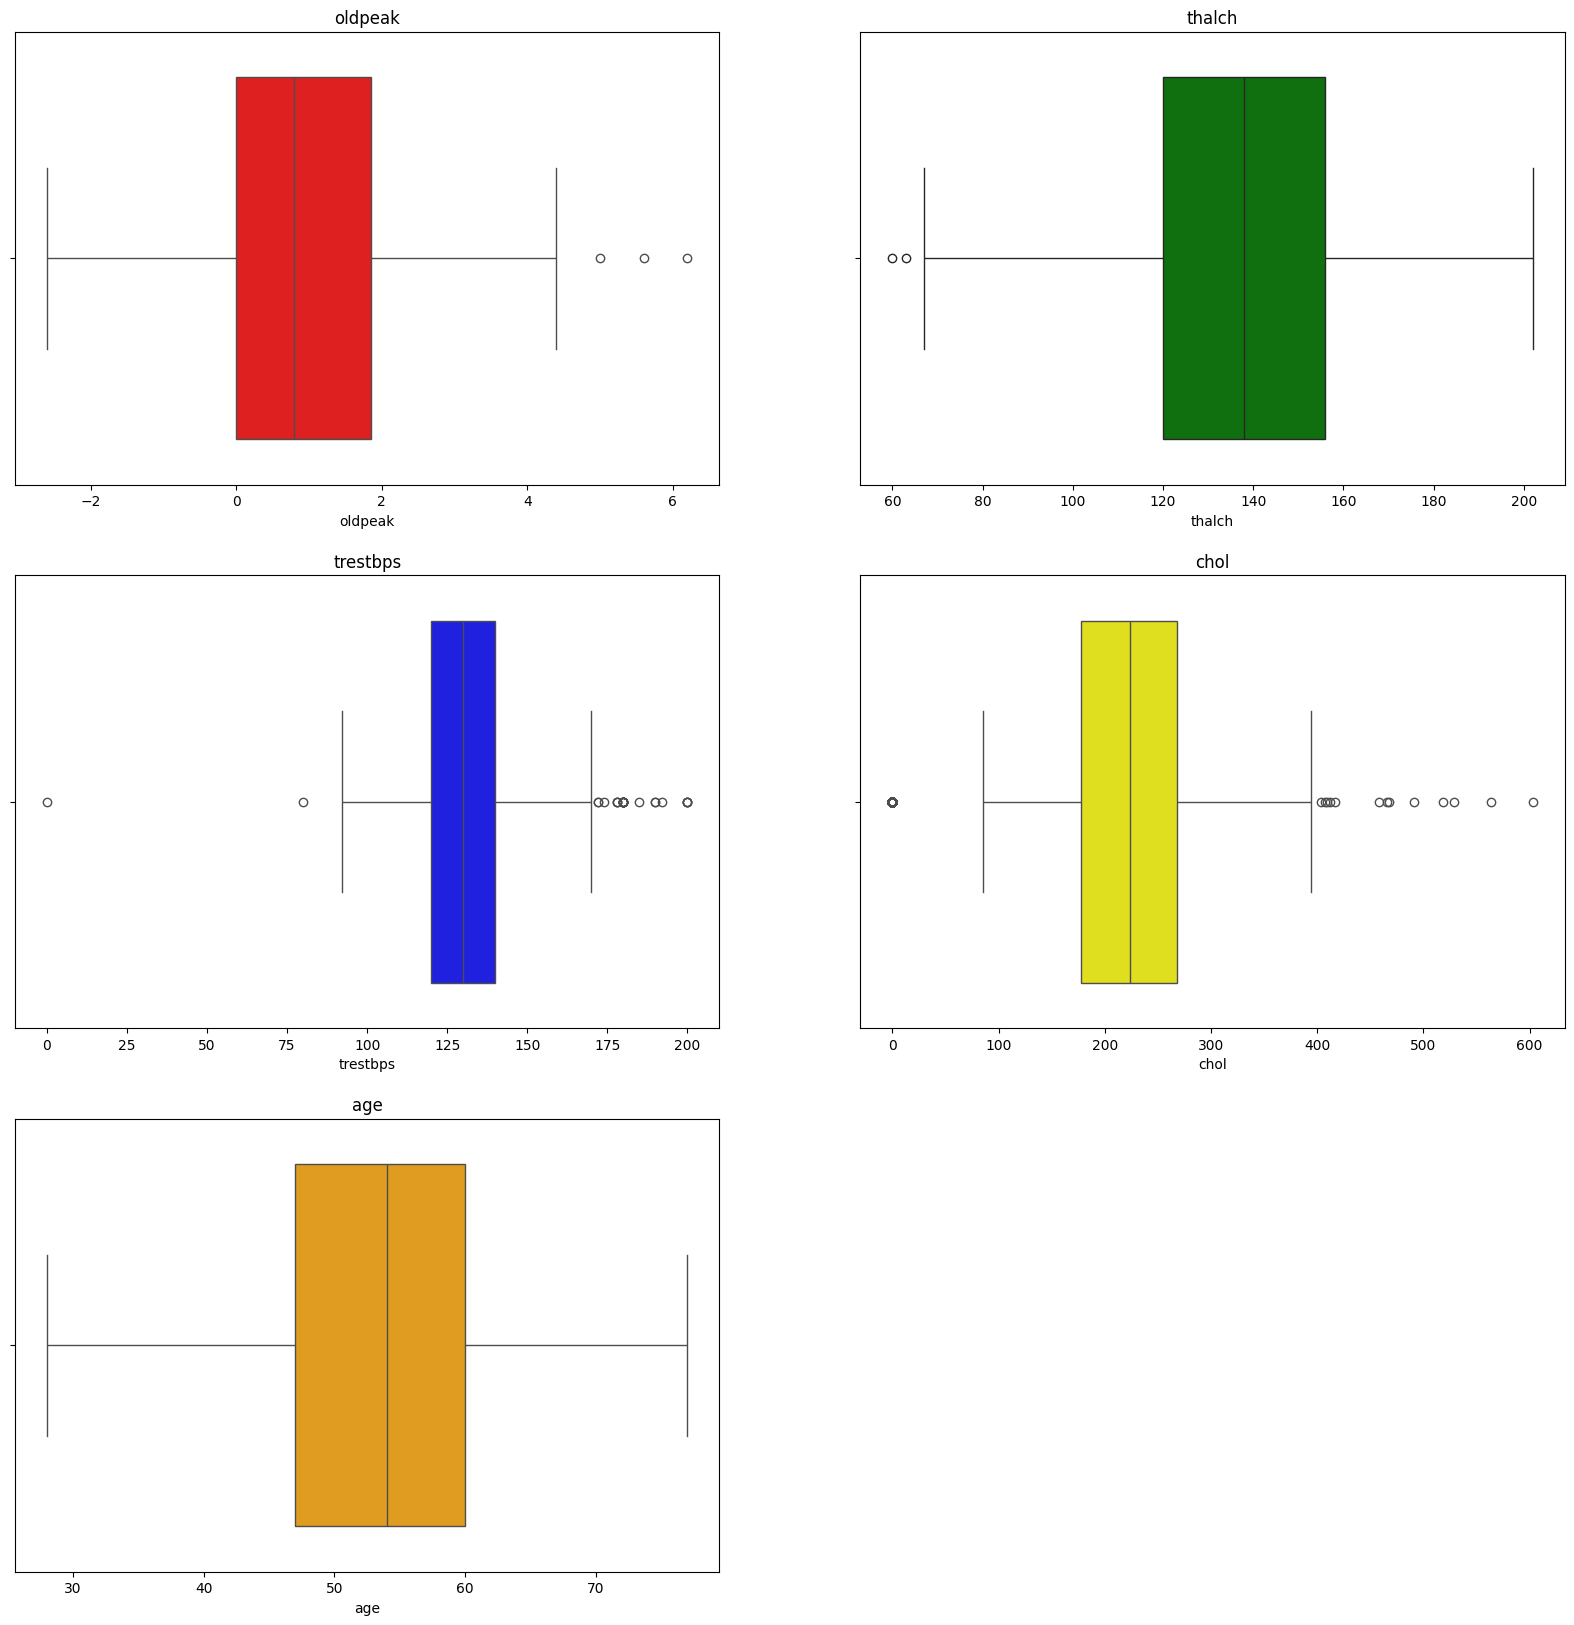

In [34]:
# create a plot of all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'yellow', 'orange']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
    
plt.show()
    
    

In [35]:
# make box plot of all numeric columns using plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()



In [36]:
# print the rows where trestbps column is greater than 0
df[df['trestbps'] == 0]

# remove this row from the dataframe
df = df[df['trestbps'] != 0]


In [37]:
# print the row where testrbs column is 80
df[df['trestbps'] == 80]

# remove this row from the dataframe
df = df[df['trestbps'] != 80]



In [38]:
# print the row where chol column is 0
df[df['chol'] == 0]


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.00,0.0,False,normal,127.00,False,0.700,upsloping,NaN,normal,1
598,599,34,Male,Switzerland,asymptomatic,115.00,0.0,False,normal,154.00,False,0.200,upsloping,NaN,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,129.03,0.0,False,normal,130.00,True,1.344,flat,NaN,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.00,0.0,False,normal,125.00,True,1.000,flat,NaN,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.00,0.0,False,normal,166.00,False,2.800,upsloping,NaN,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.00,0.0,False,normal,120.00,False,0.500,upsloping,NaN,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.00,0.0,True,st-t abnormality,160.00,False,3.000,flat,NaN,fixed defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.00,0.0,False,st-t abnormality,110.00,True,1.000,downsloping,NaN,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,133.91,0.0,False,lv hypertrophy,119.10,True,1.974,flat,NaN,reversable defect,1


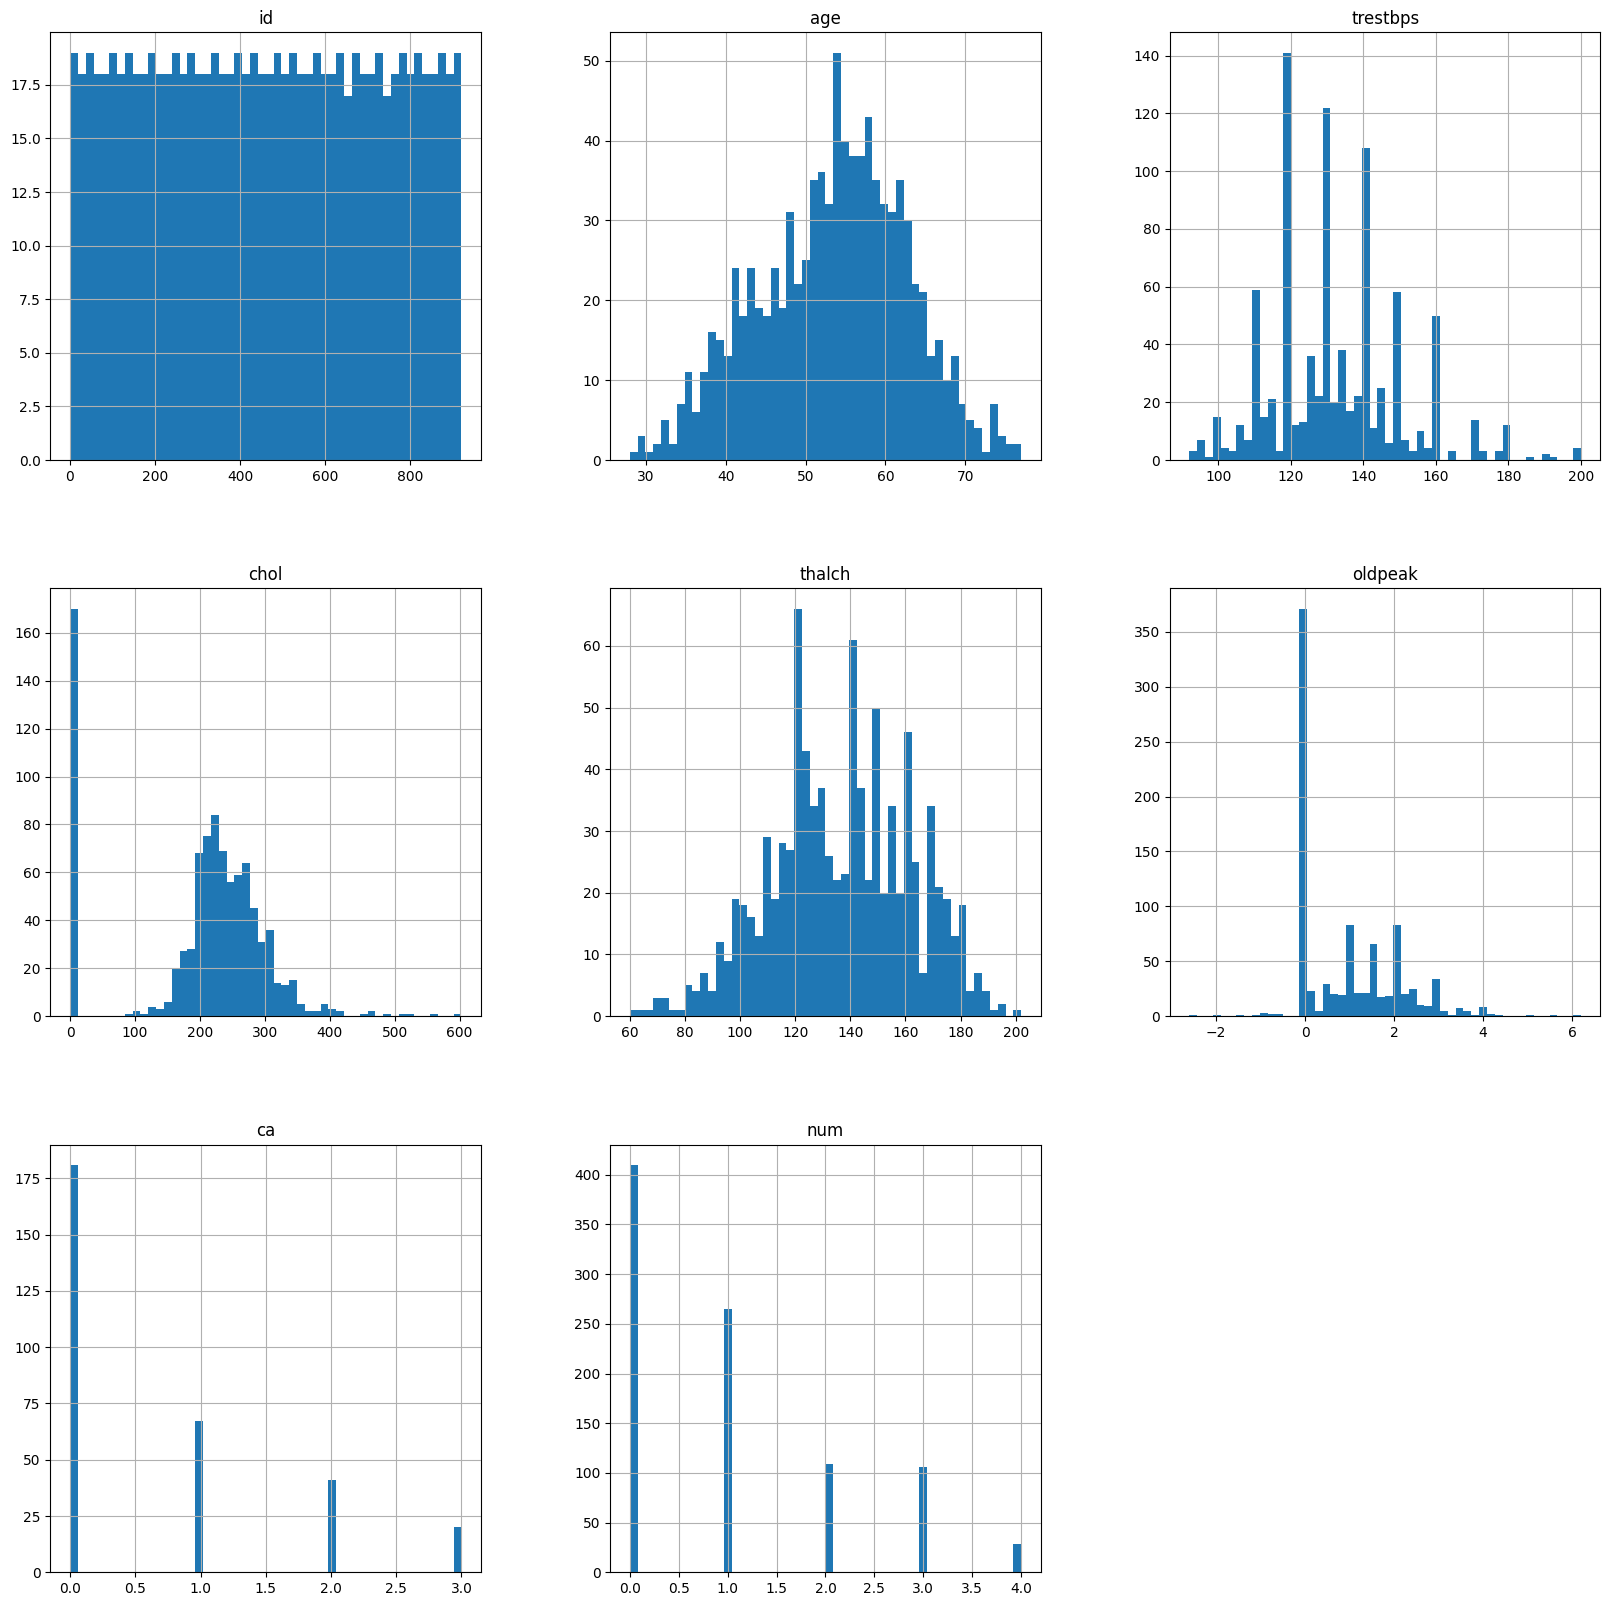

In [39]:
# exploring the numerical columns and their distribution
df.describe()

# draw the histogram of all numeric columns
df.hist(figsize=(20, 20), bins=50)
plt.show()




<Axes: xlabel='thalch'>

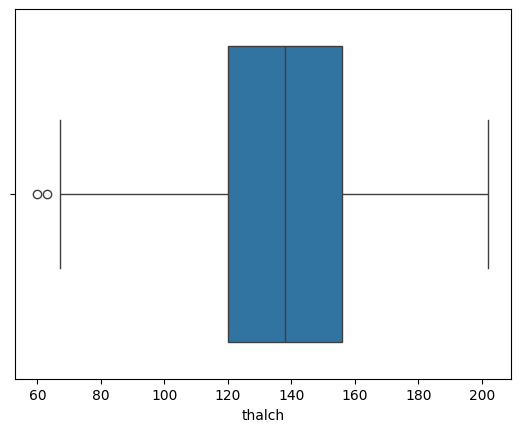

In [40]:
# drawing a boxplot of thalch column
sns.boxplot(data=df, x='thalch')


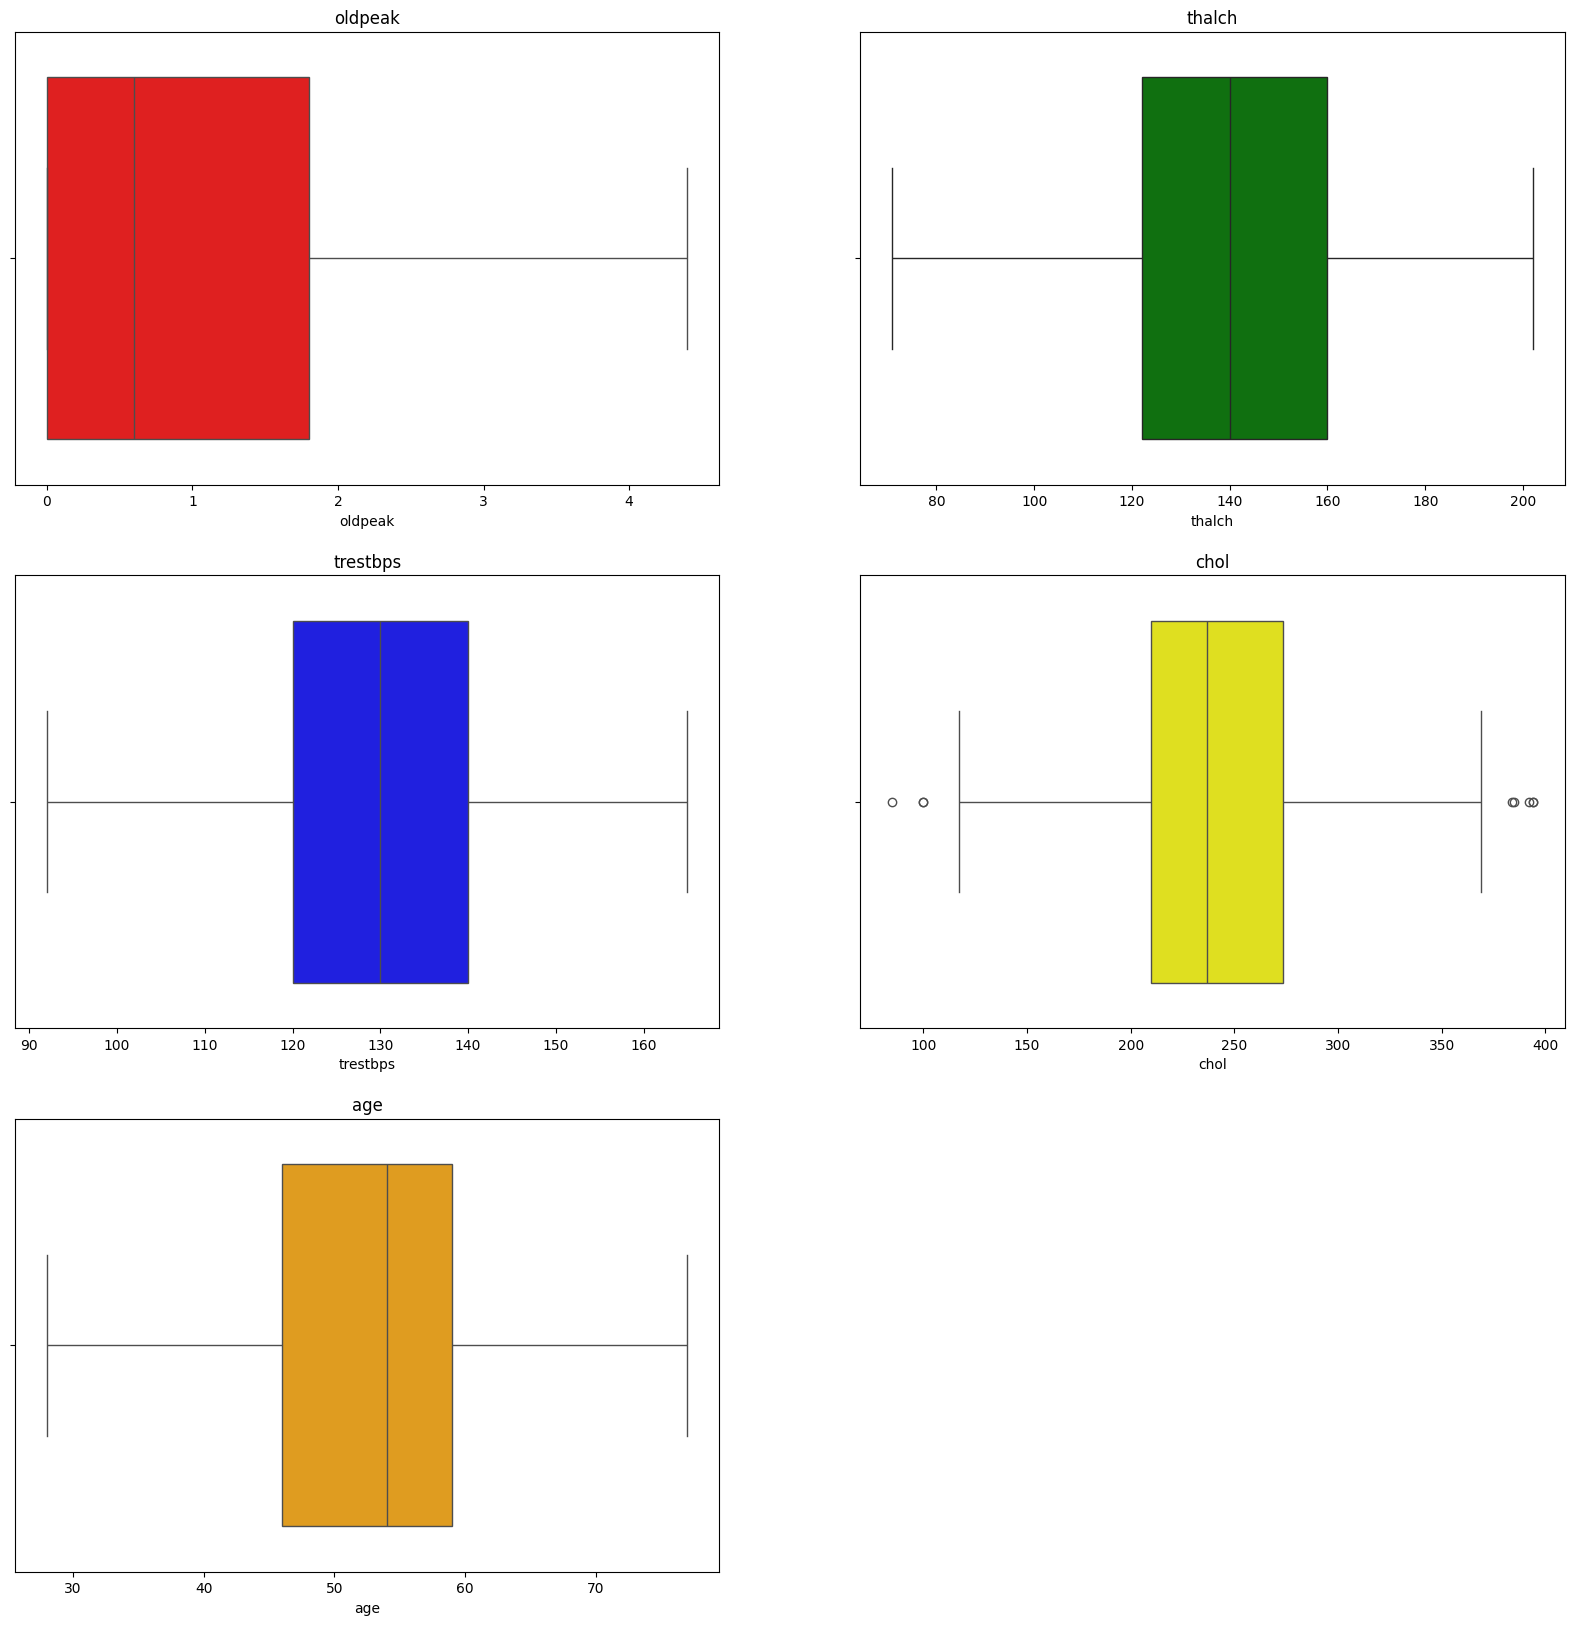

In [41]:
# removing the outliers from numeric columns

# define a function to remove outliers from numeric columns

def remove_outliers(passed_col):
    q1 = df[passed_col].quantile(0.25)
    q3 = df[passed_col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df_out = df[(df[passed_col] > lower_bound) & (df[passed_col] < upper_bound)]
    return df_out

# remove outliers from all numeric columns
for col in numeric_cols:
    df = remove_outliers(col)
    
# draw the boxplot of all numeric columns
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'yellow', 'orange']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
    
plt.show()

<span style="color:orange; font-size:250%; font-weight:bold"> Checking the Distribution of Data </span>
 

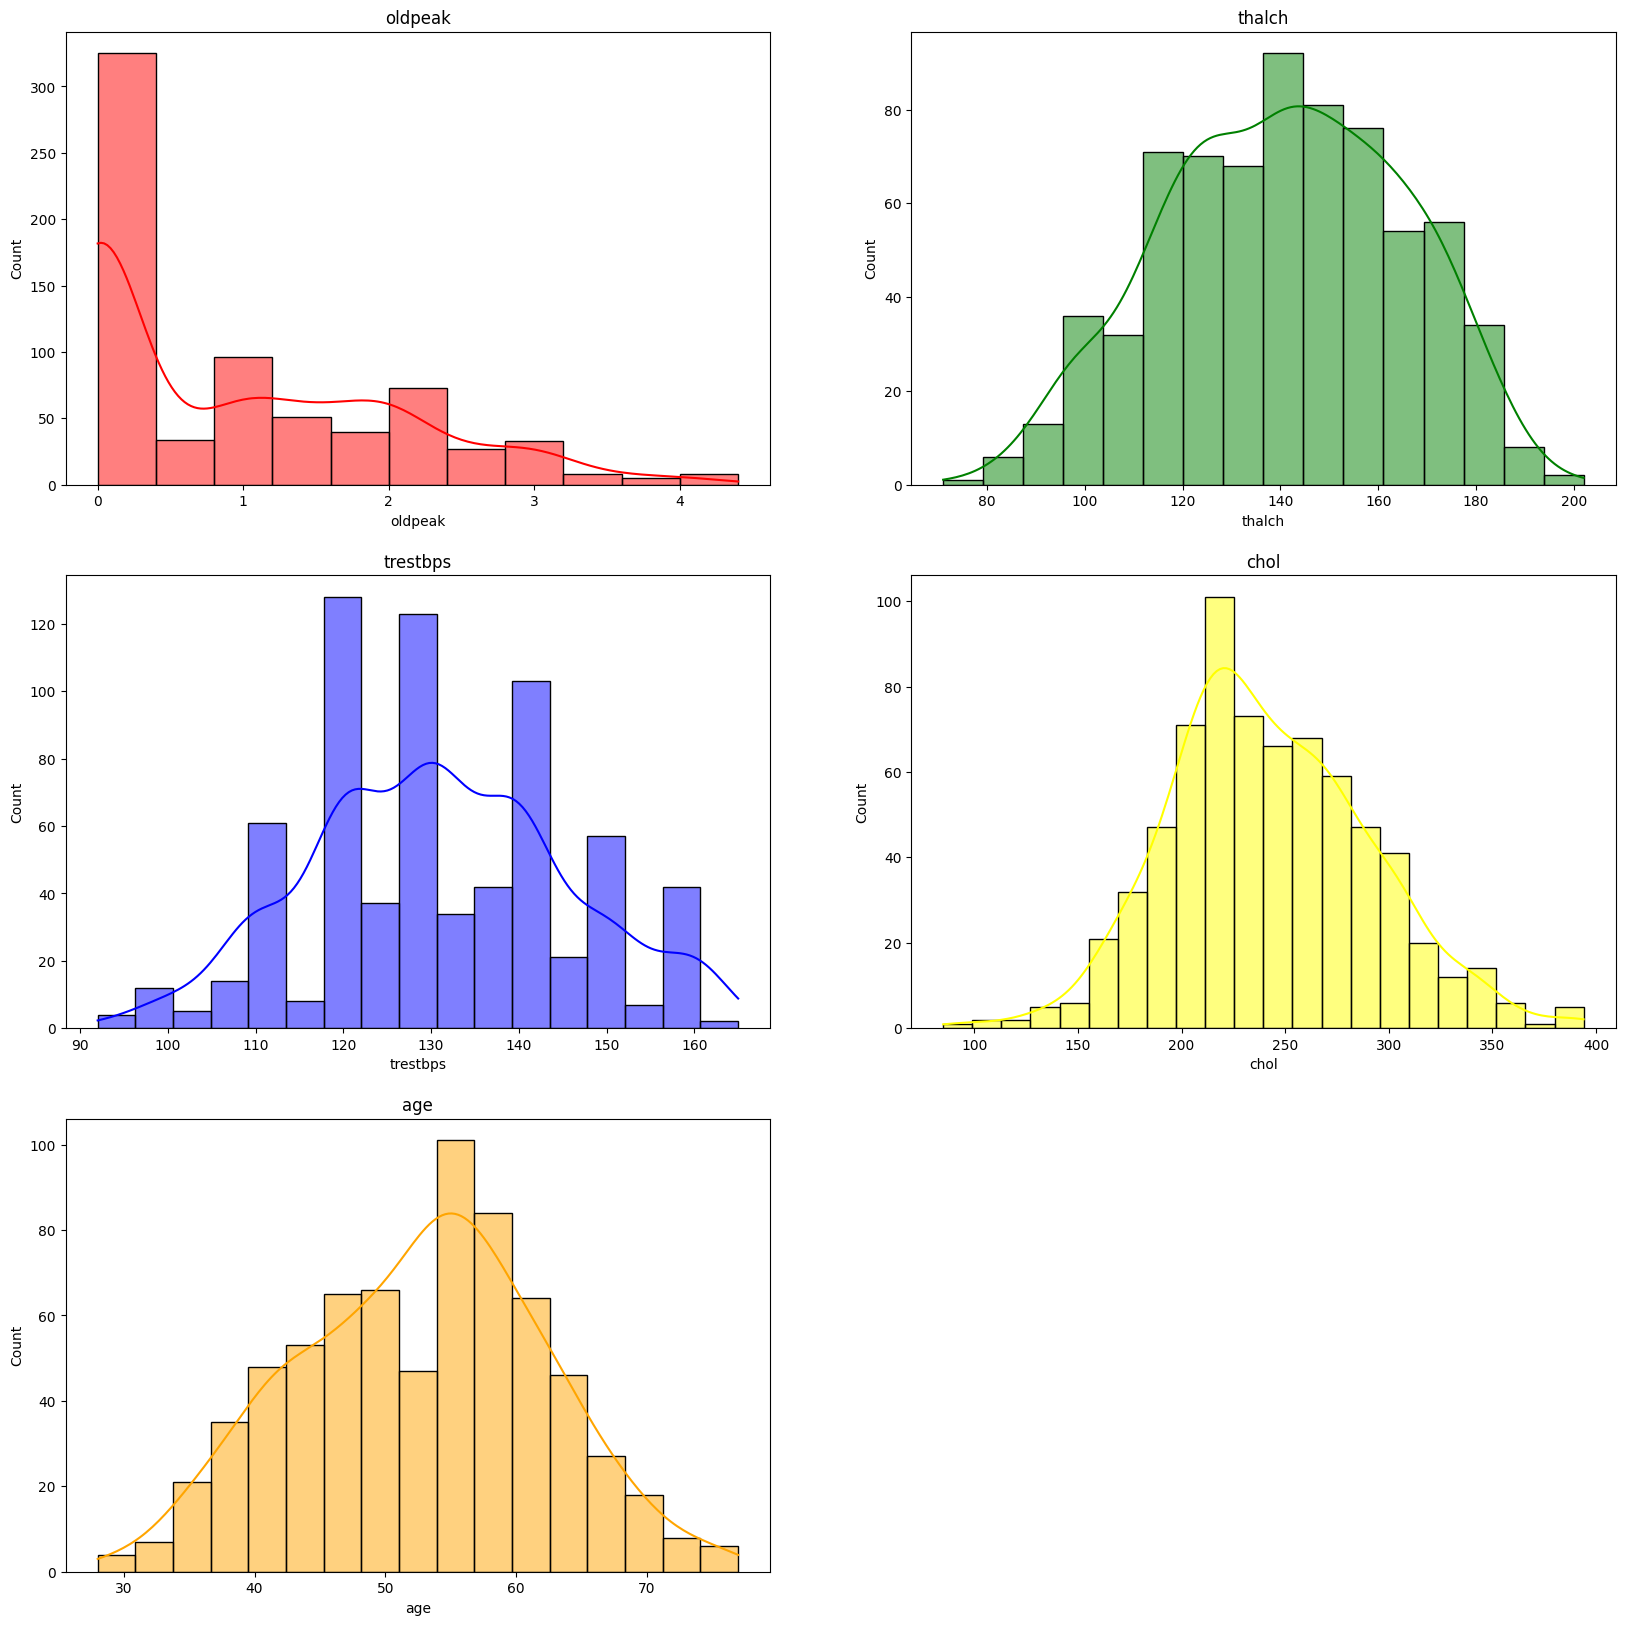

In [42]:
# checking the distriution of all numeric columns using for loop and subplot

plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'yellow', 'orange']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=df[col], color=colors[i], kde=True)
    plt.title(col)
    
plt.show()

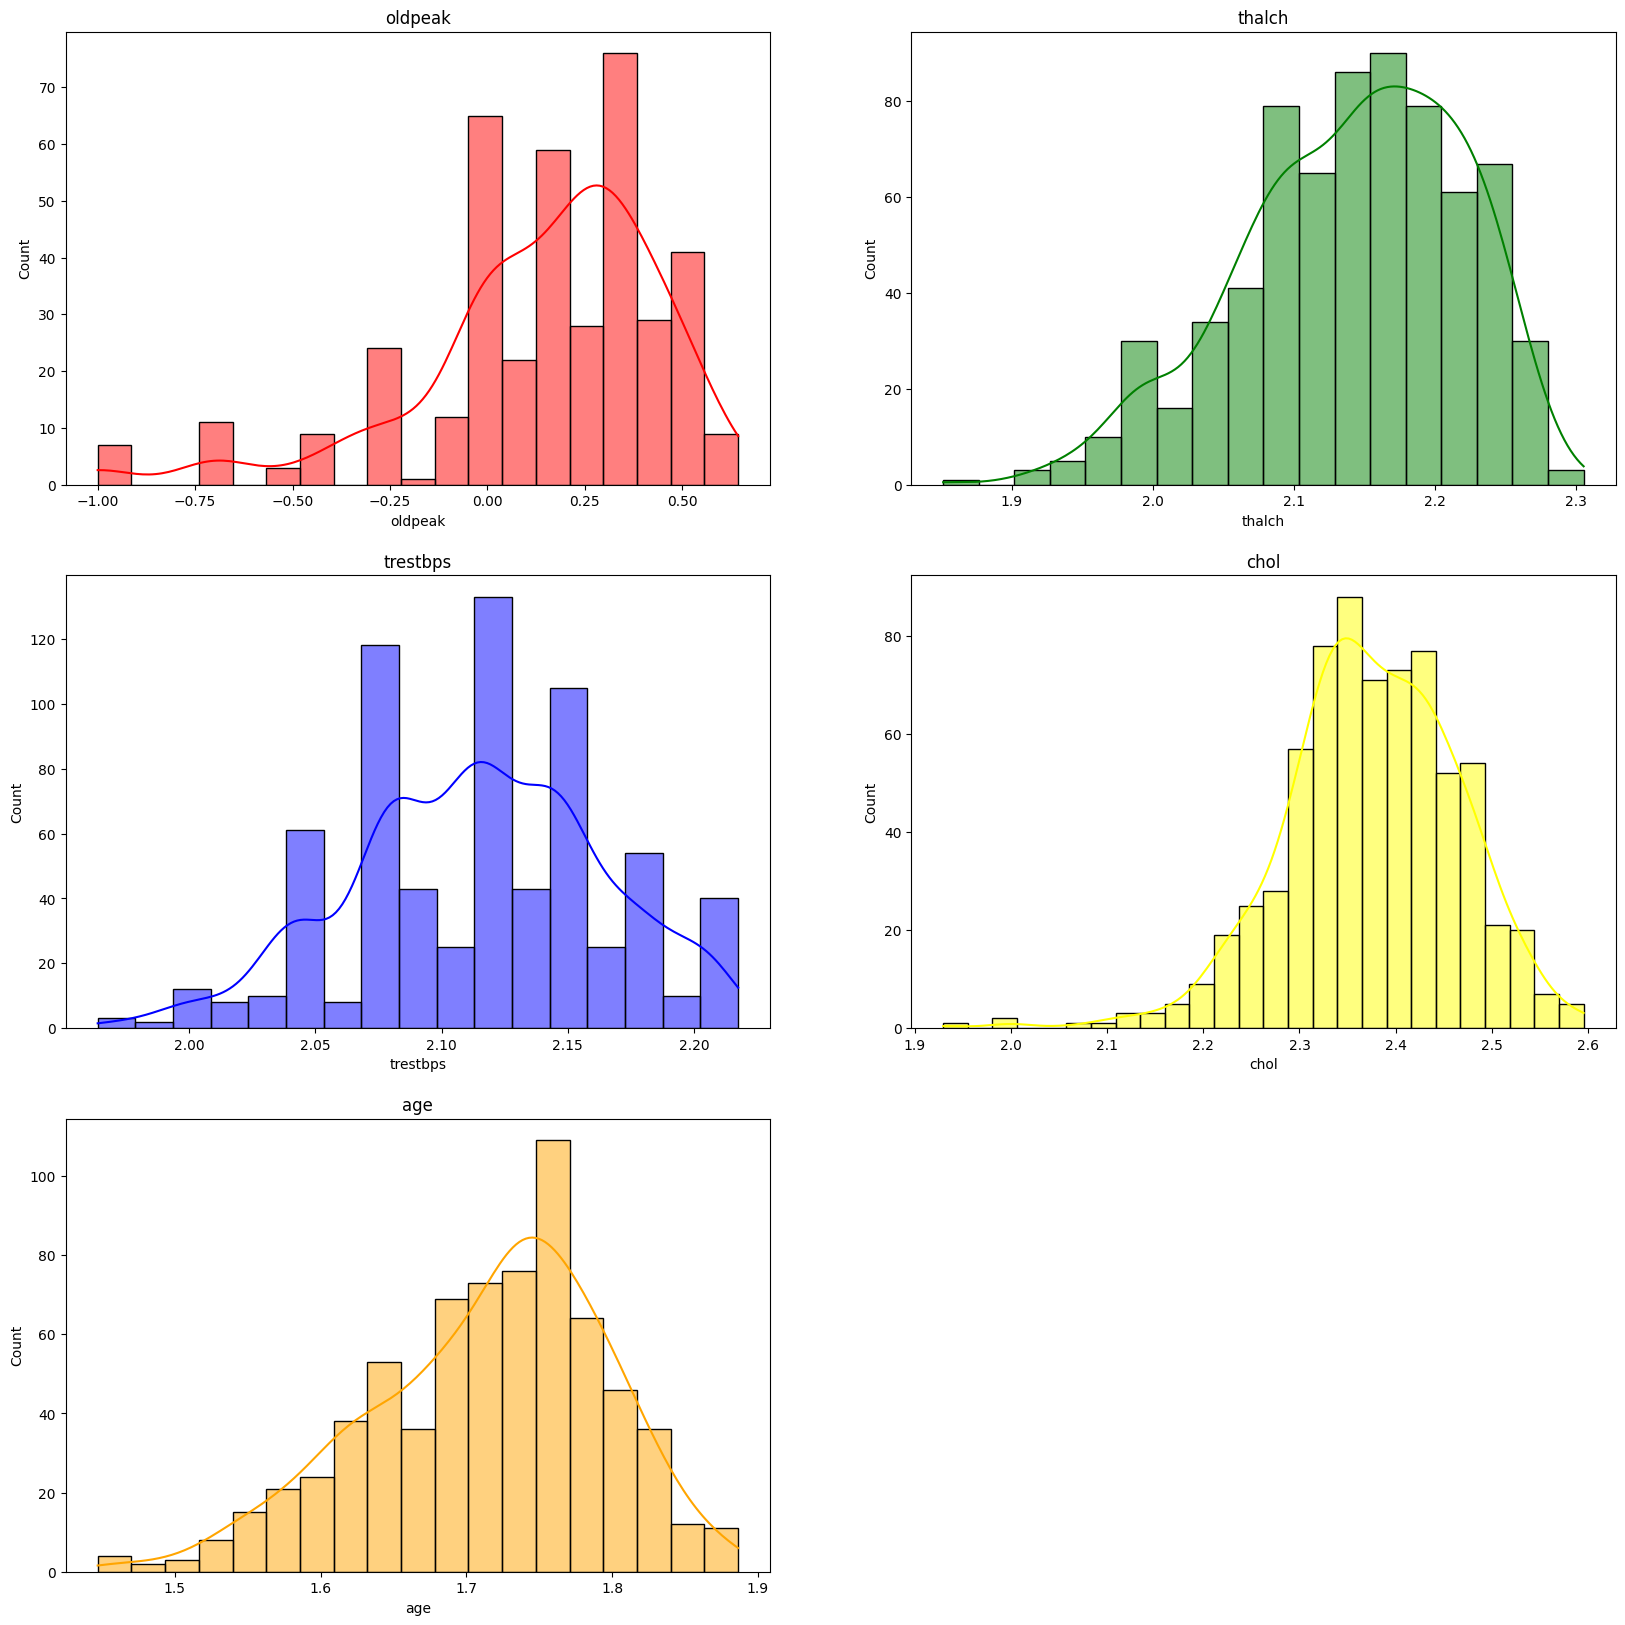

In [43]:
# normalizing the numeric columns using log10 function
for col in numeric_cols:
    df[col] = np.log10(df[col])
    
# checking the distribution of all numeric columns using for loop and subplot

plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'yellow', 'orange']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=df[col], color=colors[i], kde=True)
    plt.title(col)
    
plt.show()

<span style="color:Brown; font-size:250%; font-weight:bold"> Machine Learning </span>
 

In [44]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [45]:
df['num'].value_counts()

num
0    375
1    185
3     63
2     58
4     19
Name: count, dtype: int64

The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* 0: show us that there is no heart disease
* 1: show us that there is mild heart disease
* 2: show us that there is moderate heart disease
* 3: show us that there is severe heart disease
* 4: show us that there is very severe/critical heart disease

In [46]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
le_cp = LabelEncoder()
le_restecg = LabelEncoder()
le_slope = LabelEncoder()
le_thal = LabelEncoder()
le_dataset = LabelEncoder()
le_exang = LabelEncoder()
le_fbs = LabelEncoder()
le_sex = LabelEncoder()

X['cp'] = le_cp.fit_transform(X['cp'])
X['restecg'] = le_restecg.fit_transform(X['restecg'])
X['slope'] = le_slope.fit_transform(X['slope'])
X['thal'] = le_thal.fit_transform(X['thal'])
X['dataset'] = le_dataset.fit_transform(X['dataset'])
X['exang'] = le_exang.fit_transform(X['exang'])
X['fbs'] = le_fbs.fit_transform(X['fbs'])
X['sex'] = le_sex.fit_transform(X['sex'])


# Task: Inverse Transform the data to get the original values of categorical columns

# inverse transform the data to get the original values of categorical columns
# X['cp'] = le_cp.inverse_transform(X['cp'])
# X['restecg'] = le_restecg.inverse_transform(X['restecg'])
# X['slope'] = le_slope.inverse_transform(X['slope'])
# X['thal'] = le_thal.inverse_transform(X['thal'])
# X['dataset'] = le_dataset.inverse_transform(X['dataset'])
# X['exang'] = le_exang.inverse_transform(X['exang'])
# X['fbs'] = le_fbs.inverse_transform(X['fbs'])
# X['sex'] = le_sex.inverse_transform(X['sex'])

# checking the data
X.head()



# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Lisitng all the models that we wil be using for this project:

1. Logistic Regression
2. KNN (K-Nearest Neighbors)
3. Decision Tree
4. Random Forest
5. XGBoost (Extreme Gradient Boosting)
6. Support Vector Machine (SVM)
7. Naive Bayes Classifier
8. LightGBM
9. AdaBoost
10. Gradient Boosting Classifier

In [47]:
# import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# import pipeline
from sklearn.pipeline import Pipeline

# import all the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score



In [50]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Check for NaN and infinite values
print("NaN values present:", np.any(np.isnan(X)))
print("Infinite values present:", np.any(np.isinf(X)))

# Replace NaN values with appropriate imputation strategy or remove rows/columns
X = X.fillna(0)  # Replace NaN with 0, you may choose a different strategy based on your data

# Handle infinite values by replacing them with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e18, inplace=True)  # Replace with a large finite value

# Check again for NaN and infinite values
print("NaN values present after handling:", np.any(np.isnan(X)))
print("Infinite values present after handling:", np.any(np.isinf(X)))

# Scale your data to prevent issues with large values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


NaN values present: True
Infinite values present: True
NaN values present after handling: False
Infinite values present after handling: False


In [52]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42, n_estimators=50)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        #  ('imputer', SimpleImputer(strategy='most_frequent')),
        #  ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)



Model: Random Forest
Cross-validation Accuracy: 0.7107142857142857
Test Accuracy: 0.6642857142857143

Model: Gradient Boosting
Cross-validation Accuracy: 0.7053571428571429
Test Accuracy: 0.6571428571428571

Model: Support Vector Machine
Cross-validation Accuracy: 0.6571428571428571
Test Accuracy: 0.6071428571428571

Model: Logistic Regression
Cross-validation Accuracy: 0.6517857142857142
Test Accuracy: 0.6142857142857143

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.6535714285714285
Test Accuracy: 0.5928571428571429

Model: Decision Tree
Cross-validation Accuracy: 0.6660714285714286
Test Accuracy: 0.6

Model: Ada Boost
Cross-validation Accuracy: 0.6446428571428571
Test Accuracy: 0.5214285714285715

Model: XG Boost
Cross-validation Accuracy: 0.7017857142857143
Test Accuracy: 0.6285714285714286

Model: Naive Bayes
Cross-validation Accuracy: 0.4482142857142857
Test Accuracy: 0.35714285714285715

Best Model: Pipeline(steps=[('model',
                 RandomForestClassifier(n_es

In [53]:
# saving the model
import pickle 
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

#### Output 
1. The minimum age of the patient is 29 years.
2. Most of the patients are in the age group of 53-54 years.
3. Most of the male and female have heart disease in the age group of 54-55 years. 
4. Males percentage in the data: 78.91% 
5. Females percentage in the data: 21.08%
6. Males are 274.23% more than females in the data. 
7. We have highest numbers of people from clevealnd 304 and lowest from Switzerland 123.
   1. The highest number of females are from Cleveland (97) and lowest from Va Long Beach(6).
   2. The highest number of males are from Hungary (212) and lowest from Switzerland (113).
8. `Observations here about mean, median and mode of age column, grouped by dataset column.`
   1. The mean of age column grouped by dataset column: 
      1. Cleveland: 54.351974
      2. Hungary: 47.894198
      3. Switzerland: 55.317073
      4. VA Long Beach: 59.35000
   2. The median of age column grouped by dataset column:
      1. Cleveland: 55.5
      2. Hungary: 49.0
      3. Switzerland: 56.0
      4. VA Long Beach: 60.0
   3. The mode of age column grouped by dataset column:
      1. Cleveland: 58.0
      2. Hungary: 54.0
      3. Switzerland: 61.0
      4. VA Long Beach: 62.0
9. `The observations of cp column here:`
   1. The most common chest pain type is atypical angina.
   2. The least common chest pain type is typical angina.
10. `The steps of imputing missing values and why did i choose these methods?`
    1. First i will check the missing values in the data.
    2. Then i will check the data types of the columns.
    3. Then i split the data into numerical and categorical columns and stored it in an object because we will be using it later.
    4. Then i made a function to impute the missing values because we have missing values in both numerical and categorical columns.
        * I used the Iterative Imputer for numerical/ continous data type columns because it is a multivariate imputation method that estimates each feature from all the others in a round-robin fashion. It uses the Bayesian Ridge regression model to estimate the missing values. For categorical columns i used the Random forest classifier because it is a supervised learning algorithm that uses ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.
11. `How we deal with outliers step by step process:`
     1. First we will check the outliers in the data by plotting boxplot of each column because boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It is used to detect outliers in the data.
     2. Then we see whether the outliers are valid or not. If they are valid then we will keep them otherwise we will remove them as i removed an outlier from the tbrstbps column because the normal resting blood pressure is 120/80 mm Hg.
     3. There you can still see that there are some outliers in the data but we will not remove them because they are valid.
12. `Observations about all the columns:`
    - What i found in this data set is that there seems to be many outliers when we saw while plotting but they were not, when i tried to keep them then i got the accuracy not more than 63% from RandomForest and the other algorithms was showing me even les than that during cross-validation, then i removed the outliers, applied log transformation on our dataset further scaled it and then at the end i applied all of my algorithms, i got 71% accuracy.
13. `Observations from the model output:`
    - The best model that i got is RandomForestClassifier with 71% accuracy, I scaled the data and then applied all the algorithms and got the best accuracy from RandomForestClassifier.
    
